In [1]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%run ./func_v3.ipynb

In [3]:
D, J = 100,100

# a side of the site
num_rows_columns = 50

alpha = 0
beta = 0.01

p = 2
r = 2

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [4]:
x_Relaxed, y_Relaxed, obj_final_relaxed, x_proj, y_proj, obj_final_binary, obj_final_ex, candidate_sites, demand_points, history= lgda_solver(
    D,J,num_rows_columns,
    p, r,
    alpha,beta,h_i,J_L, J_F,
    eta_x=0.01, eta_y=0.01,
    mu=0.,
    max_iter=50000,
    tau_interval=1000,
    return_history=True,
    fix_seed = True, # ランダムに実験したいときはOff
    seed = 420
)

420


In [5]:
x_Relaxed_mutation, y_Relaxed_mutation, obj_final_relaxed_mutation, x_proj_mutation, y_proj_mutation, obj_final_binary_mutation, obj_final_ex_mutation, candidate_sites_mutation, demand_points_mutation, history_mutation= lgda_solver(
    D,J,num_rows_columns,
    p, r,
    alpha,beta,h_i,J_L, J_F,
    eta_x=0.01, eta_y=0.01,
    mu=1.,
    max_iter=50000,
    tau_interval=1000,
    return_history=True,
    fix_seed = True, # ランダムに実験したいときはOff
    seed = 420
)

420


In [6]:
print("\nOptimal x:", x_proj)
print("Optimal y:", y_proj)
print("\nOptimal real x:", x_Relaxed)
print("Optimal real y:", y_Relaxed)

print("\nObjective (Relaxed):", obj_final_relaxed)
print("Objective (Binary):", obj_final_binary)
# print("\nHistory of dx:", history["dx"])
# print('objective:', history["objective"][-1])
# print("num of iter:", len(history["objective"]))


Optimal x: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Optimal y: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]

Optimal real x: [0.02953276 0.00376902 0.03822512 0.0075569  0.00089876 0.03908891
 0.01207654 0.00127693 0.02822424 0.01294977 0.00824954 0.0090077
 0.01524535 0.00896893 0.00912714 0.0042014  0.00636077 0.00069095
 0.0132568  0.02220492 0.02153256 0.00673181 0.00873301 0.03743741
 0.00072252 0.00877895 0.00031256 0.00490465 0.0203695  0.064407
 0.01675008 0.00

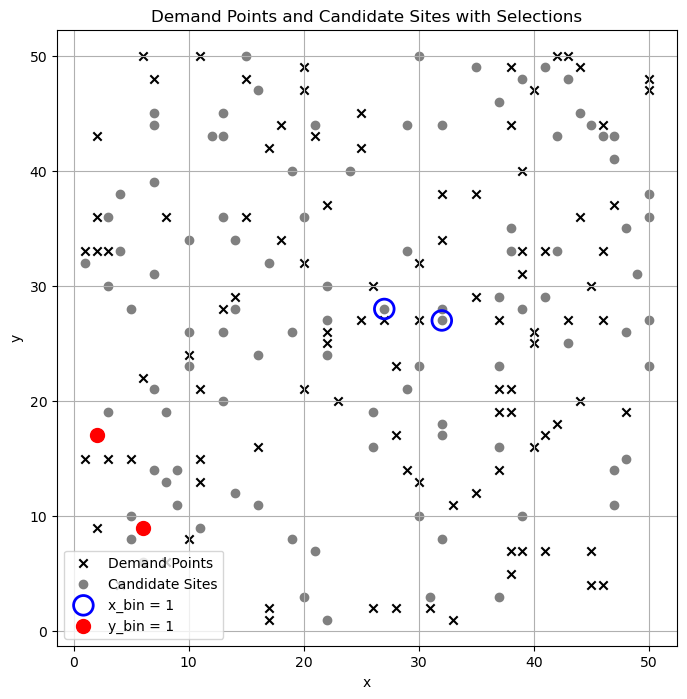

In [7]:
#plot_minmax_history(history["objective"], history["dx"], history["dy"], logy=True)

plot_facility_selection(candidate_sites, demand_points, x_proj, y_proj)

In [8]:
%run ./func_v3.ipynb

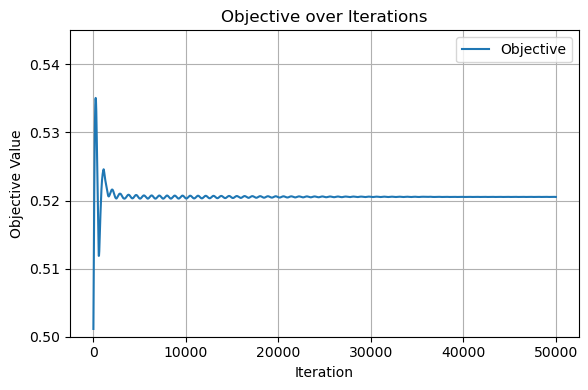

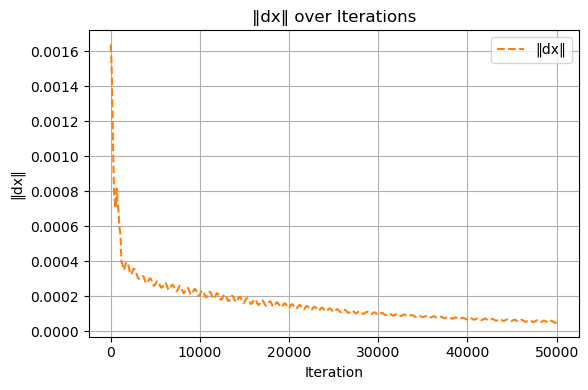

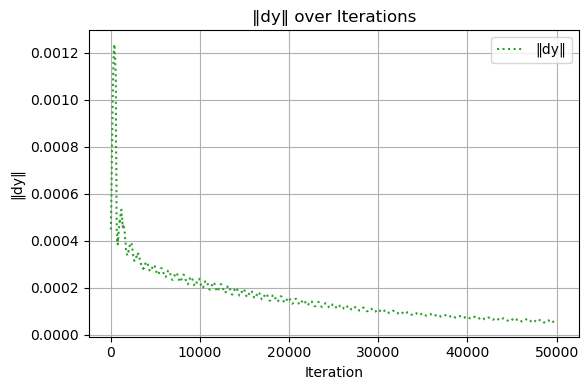

In [9]:
plot_each_history_component_separately(history, fix_seed = True,) # ランダムに実験したいときはOff)

{'iters_recorded': 50000, 'median_rel_obj_change': 2.0529201738561653e-07, 'last_rel_obj_change': 3.6870141717493254e-08, 'obj_sign_flips': 119, 'dx_last': 5.312771297457345e-05, 'dx_moving_avg_last': 5.2261903816960584e-05, 'dx_below_tol_ratio': 0.0, 'dy_last': 5.6509286249649754e-05, 'dy_moving_avg_last': 5.737173044244709e-05, 'dy_below_tol_ratio': 0.0, 'likely_stagnated': False, 'likely_oscillating': False}


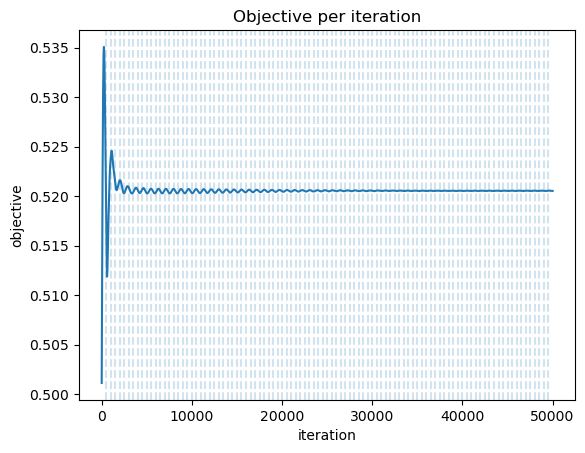

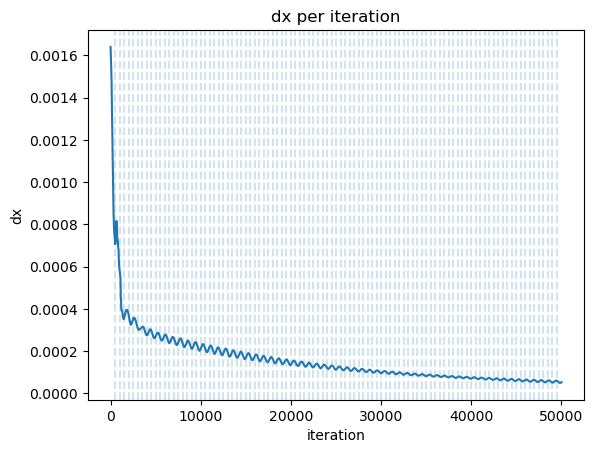

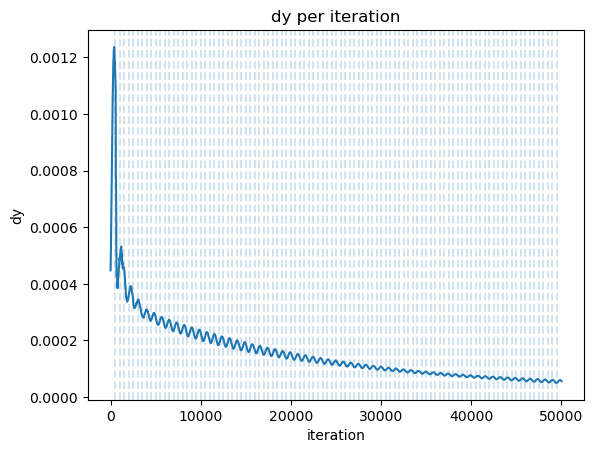

In [10]:
diag = summarize_history(history, tol=1e-6)
print(diag)

# 2) 可視化（tau_interval をそのまま渡すと便利）
plot_history(history, tau_interval=500)

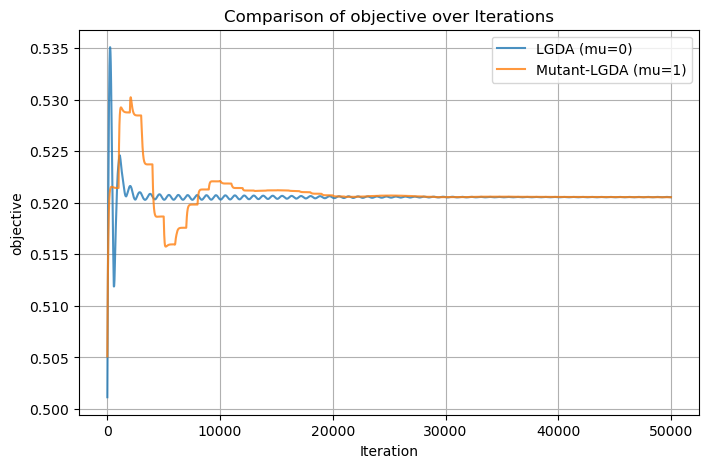

In [12]:
hist0 = history
hist1 = history_mutation

dx0 = np.array(hist0["objective"])
dx1 = np.array(hist1["objective"])

# プロット
plt.figure(figsize=(8,5))
plt.plot(dx0, label="LGDA (mu=0)", alpha=0.8)
plt.plot(dx1, label="Mutant-LGDA (mu=1)", alpha=0.8)

plt.xlabel("Iteration")
plt.ylabel("objective")
plt.title("Comparison of objective over Iterations")
plt.legend()
plt.grid(True)
plt.show()